<a href="https://colab.research.google.com/github/David-Kumawat/Capstone-Project---4-Zomato-Restaurant-Clustering-And-Sentiment-Analysis/blob/main/Unsupervised_Zomato_Restaurant_Clustering_And_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Zomato Restaurant Clustering And Sentiment Analysis



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual

# **GitHub Link -**

https://github.com/David-Kumawat/Capstone-Project---4-Zomato-Restaurant-Clustering-And-Sentiment-Analysis

# **Problem Statement**


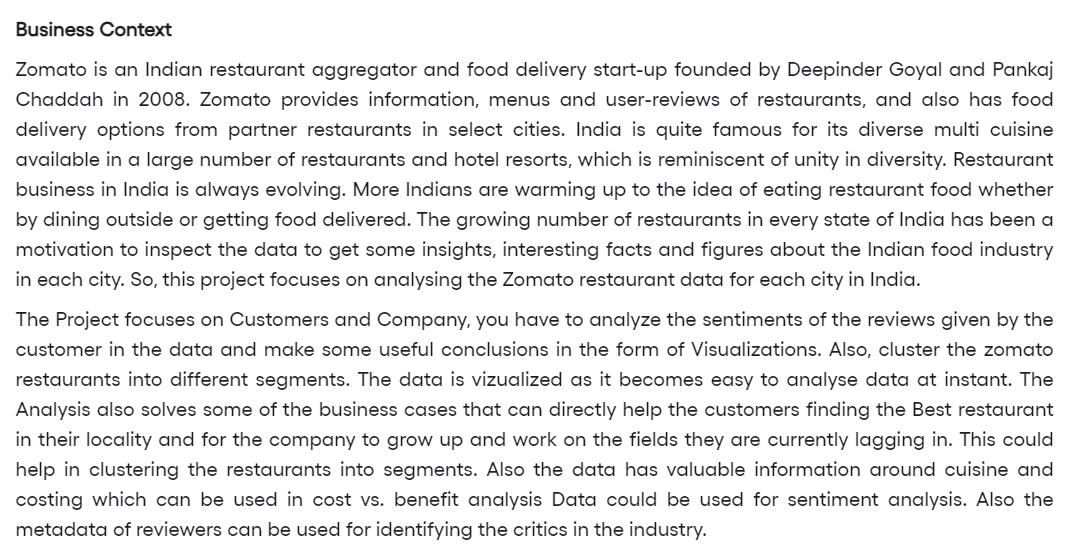


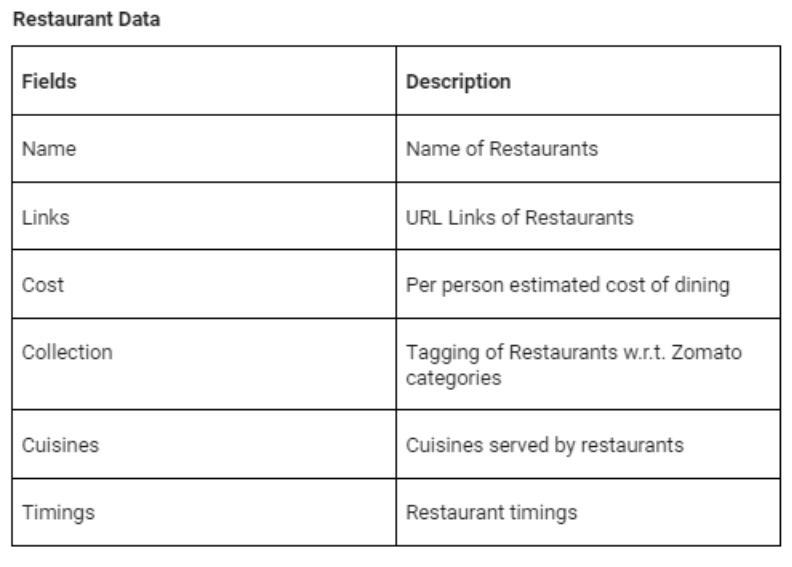

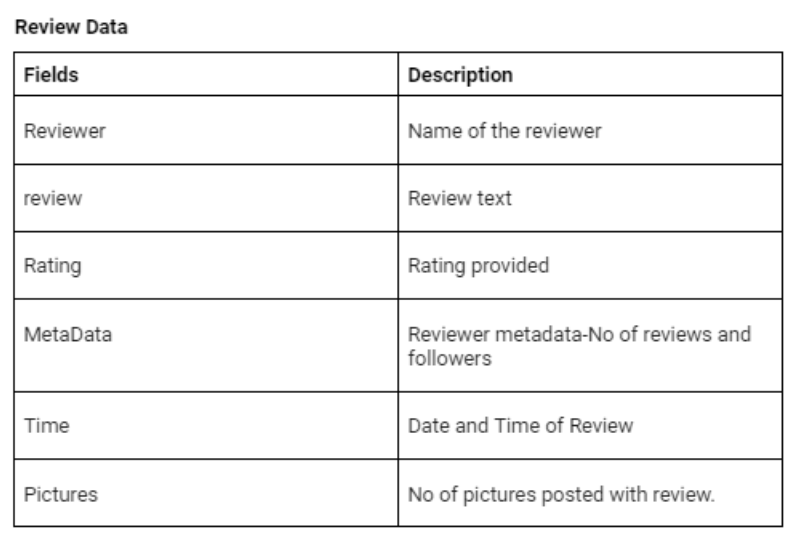

# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


### Dataset Loading

In [3]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Load Dataset
rest_df = pd.read_csv('/content/drive/MyDrive/Capstone Project(Unsupervised)/Zomato Restaurant names and Metadata.csv')
reviews_df = pd.read_csv('/content/drive/MyDrive/Capstone Project(Unsupervised)/Zomato Restaurant reviews.csv')

### Dataset First View

In [5]:
# Restaurant Dataset First Look
rest_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [6]:
# Reviews dataset First Look
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


### Dataset Rows & Columns count

In [7]:
# Restaurant Dataset Rows & Columns count
print(f"Rows and Column count in the Restaurant Dataset: Rows= {rest_df.shape[0]}, Columns= {rest_df.shape[1]}")

Rows and Column count in the Restaurant Dataset: Rows= 105, Columns= 6


In [8]:
# Reviews Dataset Rows & Columns count
print(f"Rows and Column count in the Reviews Dataset: Rows= {reviews_df.shape[0]}, Columns= {reviews_df.shape[1]}")

Rows and Column count in the Reviews Dataset: Rows= 10000, Columns= 7


### Dataset Information

In [9]:
# Restaurant Dataset Info
rest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [10]:
# Reviews Dataset Info
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


#### Duplicate Values

In [11]:
# Restaurant Dataset Duplicate Value Count
rest_df.duplicated().sum()

0

In [12]:
# Reviews Dataset Duplicate Value Count
reviews_df.duplicated().sum()

36

In [13]:
# Duplicate Values
duplicates = reviews_df[reviews_df.duplicated()]
duplicates

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
8778,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8779,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8780,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8781,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8782,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8783,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8784,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8785,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8786,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8787,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0


In the data set, we have duplicate null values.

#### Missing Values/Null Values

In [14]:
# # Rest_df Missing Values/Null Values Count
# Missing Values/Null Values Count
print("-"*50)
print("Null value count in each of the variable: ")
print("-"*50)
print(rest_df.isna().sum())
print("-"*50)

# Percentage of null values in each category
print("Percentage of null values in each variable: ")
print("-"*50)
null_count_by_variable = rest_df.isnull().sum()/len(rest_df)
print(f"{null_count_by_variable*100}%")
print("-"*50)


--------------------------------------------------
Null value count in each of the variable: 
--------------------------------------------------
Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64
--------------------------------------------------
Percentage of null values in each variable: 
--------------------------------------------------
Name            0.000000
Links           0.000000
Cost            0.000000
Collections    51.428571
Cuisines        0.000000
Timings         0.952381
dtype: float64%
--------------------------------------------------


In [15]:
# Reviews_df Missing Values/Null Values Count
# Missing Values/Null Values Count
print("-"*50)
print("Null value count in each of the variable: ")
print("-"*50)
print(reviews_df.isna().sum())
print("-"*50)

# Percentage of null values in each category
print("Percentage of null values in each variable: ")
print("-"*50)
null_count_by_variable = reviews_df.isnull().sum()/len(reviews_df)
print(f"{null_count_by_variable*100}%")
print("-"*50)


--------------------------------------------------
Null value count in each of the variable: 
--------------------------------------------------
Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64
--------------------------------------------------
Percentage of null values in each variable: 
--------------------------------------------------
Restaurant    0.00
Reviewer      0.38
Review        0.45
Rating        0.38
Metadata      0.38
Time          0.38
Pictures      0.00
dtype: float64%
--------------------------------------------------


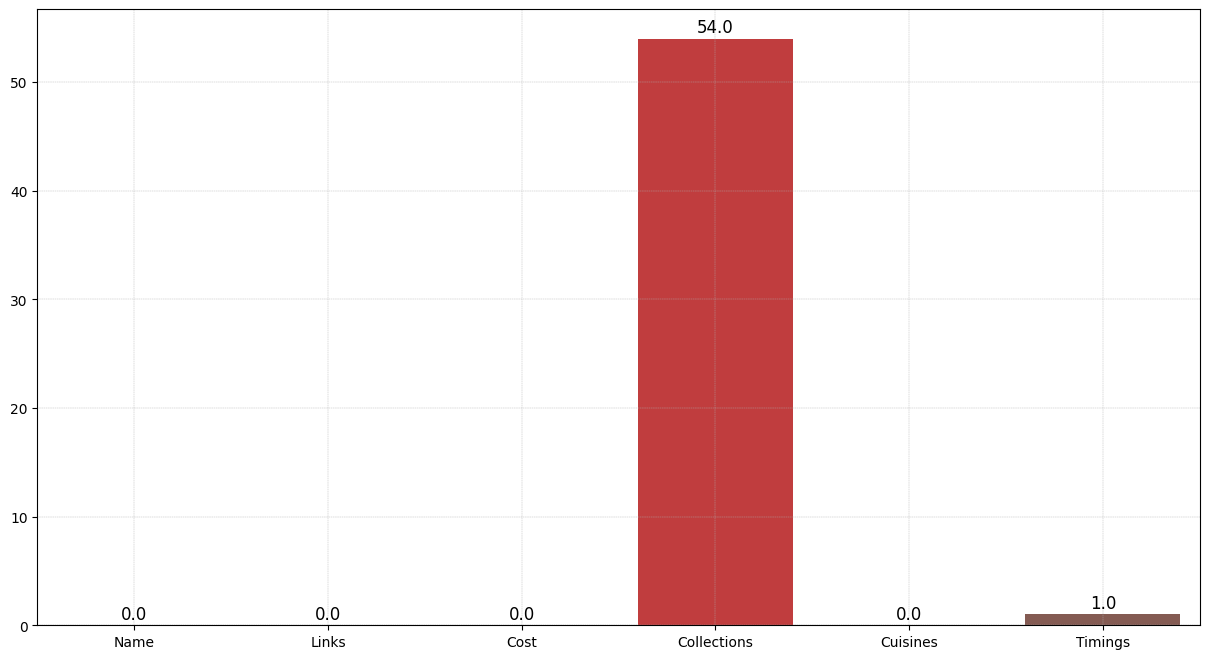

In [16]:
# Restaurant Data Visualizing the missing values
plt.figure(figsize=(15,8))
plots= sns.barplot(x=rest_df.columns,y=rest_df.isna().sum())
plt.grid(linestyle='--', linewidth=0.3)

for bar in plots.patches:
      plots.annotate(bar.get_height(),
                     (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                     size=12, xytext=(0, 8),
                     textcoords='offset points')
plt.show()

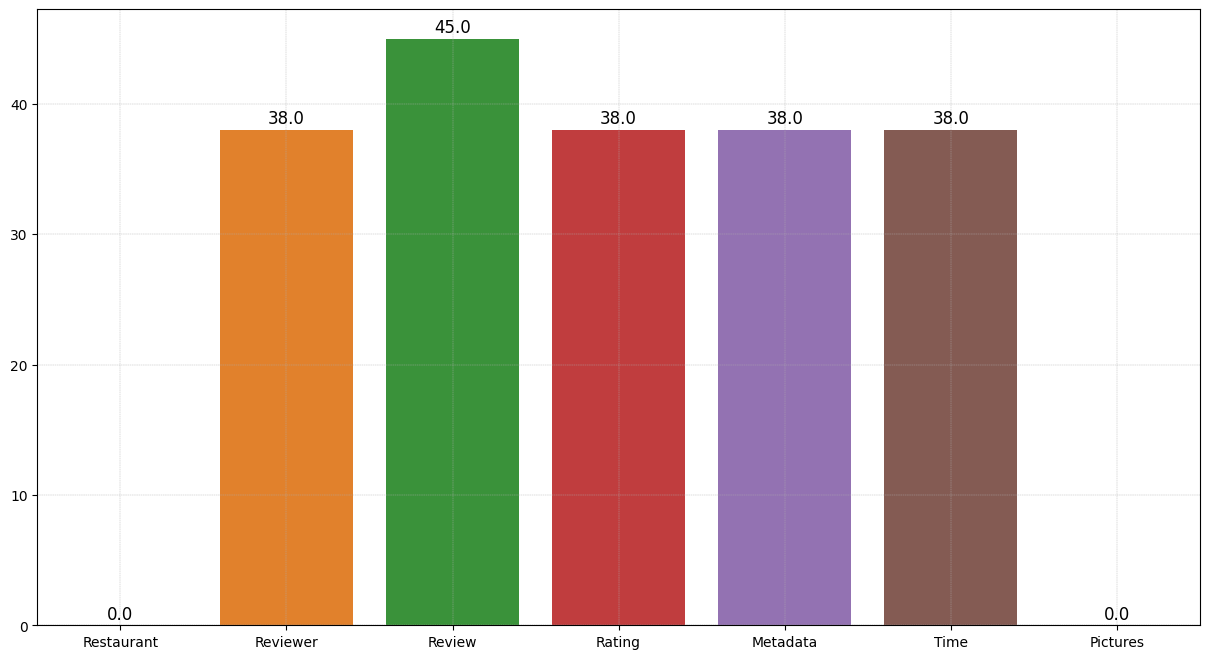

In [17]:
# Reviews Data Visualizing the missing values
plt.figure(figsize=(15,8))
plots= sns.barplot(x=reviews_df.columns,y=reviews_df.isna().sum())
plt.grid(linestyle='--', linewidth=0.3)

for bar in plots.patches:
      plots.annotate(bar.get_height(),
                     (bar.get_x() + bar.get_width() / 2,
                      bar.get_height()), ha='center', va='center',
                     size=12, xytext=(0, 8),
                     textcoords='offset points')
plt.show()

<Axes: >

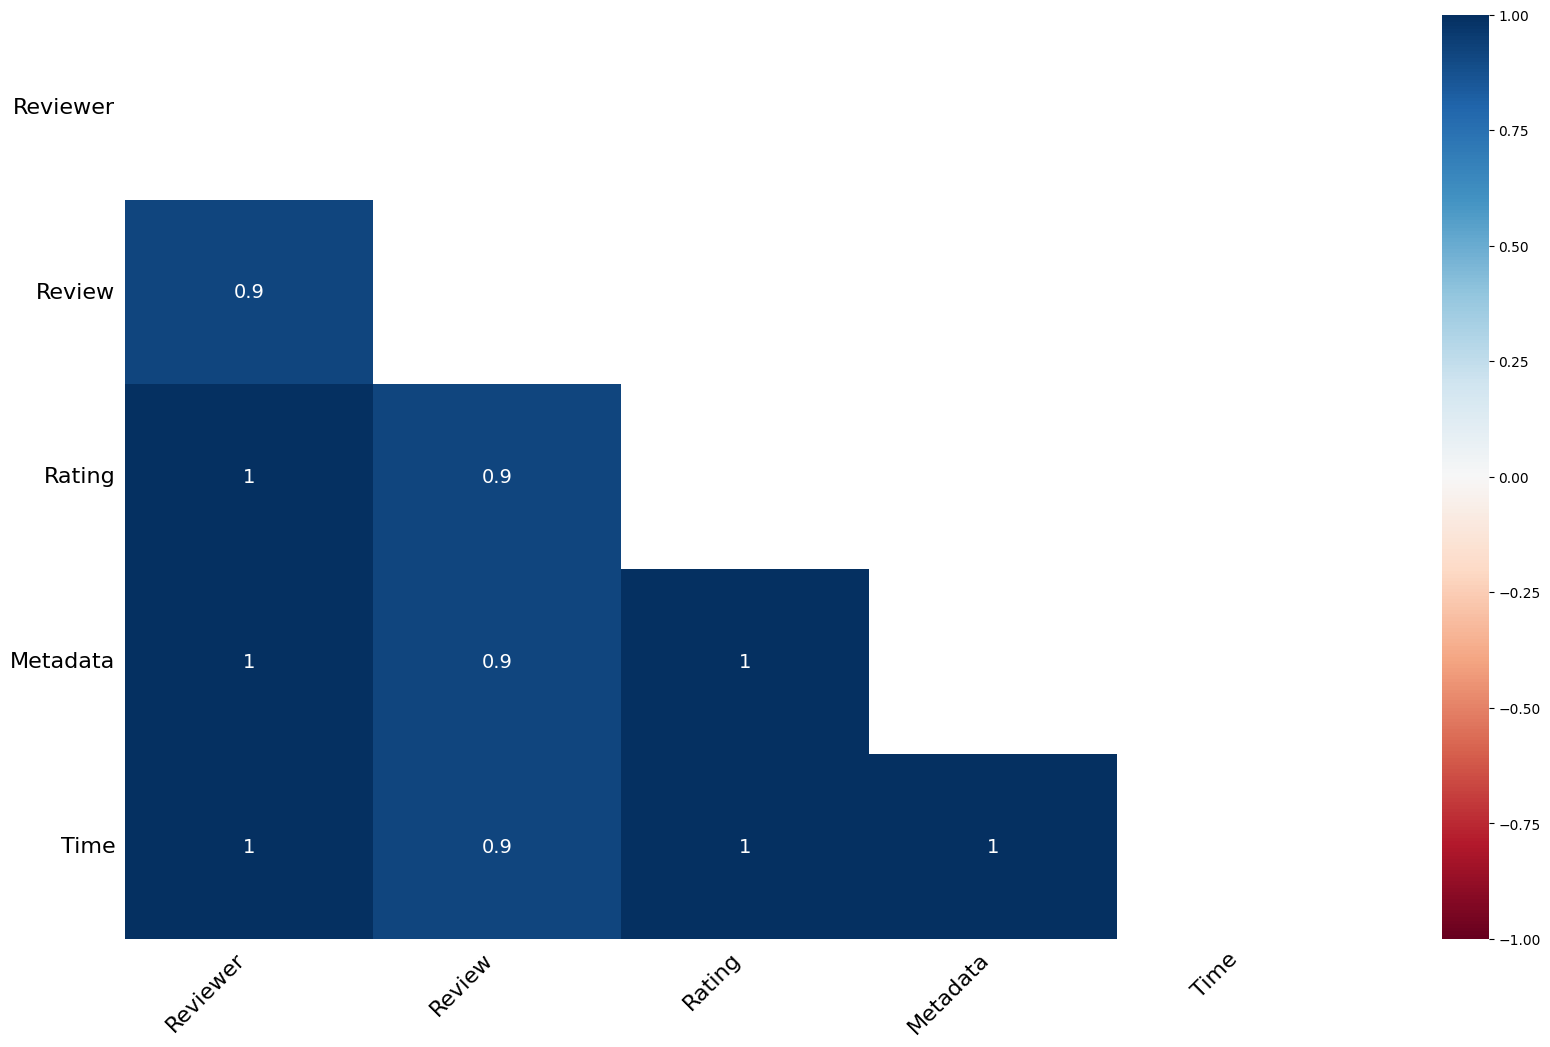

In [18]:
# Checking the heatmap
import missingno as msno
msno.heatmap(reviews_df)

### What did you know about your dataset?

* I have the two datasets 1. restaurant data and 2. reviews data

* The restaurant dataset has 105 restaurants, and with each row corresponding to each restaurant, there are 6 columns in the restaurant data set, and two columns have null values.

* The reviews dataset has 10000 rows and 7 columns, The columns Reviewer, Review, Rating, Metadata, and Time have some null values, There are 36 duplicate null values in data, and the reviewer column has 38 values that are null and 38 values in other columns. where the reviewer is missing where review, rating etc. also missing.

## ***2. Understanding Your Variables***

In [19]:
# Restaurant Dataset Columns
Columns_restaurant_df = rest_df.columns

# Print the column names
print("Column Names:")
for column in Columns_restaurant_df:
    print(column)

Column Names:
Name
Links
Cost
Collections
Cuisines
Timings


In [20]:
# Reviews Dataset Columns
Columns_reviews_df = reviews_df.columns

# Print the column names
print("Column Names:")
for column in Columns_reviews_df:
    print(column)

Column Names:
Restaurant
Reviewer
Review
Rating
Metadata
Time
Pictures


In [21]:
# Restaurant Dataset Describe
rest_df.describe(include = 'all')

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [22]:
# Reviews Dataset Describe
reviews_df.describe(include = 'all')

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
count,10000,9962,9955,9962,9962,9962,10000.000000
unique,100,7446,9364,10,2477,9782,NaN
top,Beyond Flavours,Parijat Ray,good,5,1 Review,7/29/2018 20:34,NaN
freq,100,13,237,3832,919,3,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,0.748600
std,NaN,NaN,NaN,NaN,NaN,NaN,2.570381
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,0.000000


### Variables Description

The variable description of the Zomato Restaurant Clustering And Sentiment Analysis Dataset is as follows:

###**Restaurant Dataset**

1.   Name: Name of the Restaurants.    
2.   Links: URL Links of the Restaurants in Zomato.      
3.   Cost: Per Person Estimated Cost of the Dining.   
4.   Collections: Labels that provide additional information about the restaurant.
5.   Cuisines: Different types of food like Indian, Chinese, and American.
6.   Timings: Time of the Restaurant Open and Closed.

###**Reviews Dataset**

1. Restaurant: Name of the Restaurants.
2. Reviewer: Name of the Customer who reviewed.
3. Review: Review Written by the Customers.
4. Rating: Rating Given by the Customers (1 to 5).
5. Metadata: Customer(reviewer) number of the Reviews given previously and how many Followers Customer(reviewer) has.
6. Time: Date and Time of the Review.
7. Pictures: Numbers of pictures posted with the review.

### Check Unique Values for each variable.

In [23]:
# Check Unique Values for each variable of dataset Restaurant.
print("Unique Value Counts for Each Variable:")
print("-"*35)
rest_df.nunique()


Unique Value Counts for Each Variable:
-----------------------------------


Name           105
Links          105
Cost            29
Collections     42
Cuisines        92
Timings         77
dtype: int64

In [24]:
# Check Unique Values for each variable of dataset Reviews.
print("Unique Value Counts for Each Variable:")
print("-"*35)
reviews_df.nunique()


Unique Value Counts for Each Variable:
-----------------------------------


Restaurant     100
Reviewer      7446
Review        9364
Rating          10
Metadata      2477
Time          9782
Pictures        36
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

In [25]:
# Write your code to make your dataset analysis ready.
# # Rest_df Missing Values/Null Values Count
# Missing Values/Null Values Count
print("-"*50)
print("Null value count in each of the variable: ")
print("-"*50)
print(rest_df.isna().sum())
print("-"*50)

# Percentage of null values in each category
print("Percentage of null values in each variable: ")
print("-"*50)
null_count_by_variable = rest_df.isnull().sum()/len(rest_df)
print(f"{null_count_by_variable*100}%")
print("-"*50)


--------------------------------------------------
Null value count in each of the variable: 
--------------------------------------------------
Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64
--------------------------------------------------
Percentage of null values in each variable: 
--------------------------------------------------
Name            0.000000
Links           0.000000
Cost            0.000000
Collections    51.428571
Cuisines        0.000000
Timings         0.952381
dtype: float64%
--------------------------------------------------


In [26]:
# Impute one missing row in timing column with the mode
rest_df['Timings'].fillna(rest_df['Timings'].mode()[0],inplace=True)

In [27]:
# # Rest_df Missing Values/Null Values Count
# Missing Values/Null Values Count
print("-"*50)
print("Null value count in each of the variable: ")
print("-"*50)
print(rest_df.isna().sum())
print("-"*50)



--------------------------------------------------
Null value count in each of the variable: 
--------------------------------------------------
Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         0
dtype: int64
--------------------------------------------------


In [28]:
# Checking cost column value count
rest_df['Cost'].value_counts()

500      13
600      10
700       8
1,200     7
400       6
1,000     6
200       5
800       5
1,500     5
1,300     4
350       3
1,600     3
750       3
550       3
900       3
1,100     3
1,700     2
150       2
1,400     2
450       2
1,900     2
300       1
2,500     1
850       1
650       1
1,800     1
2,800     1
1,750     1
250       1
Name: Cost, dtype: int64

In [29]:
# Changing cost datatype to int
rest_df['Cost'] = rest_df['Cost'].str.replace(',','')
rest_df['Cost'] = rest_df['Cost'].astype('int')

In [30]:
# Droping the Links Column
rest_df.drop('Links', axis = 1, inplace = True)

Dropping the Links column because its use won't be in clustering.

In [31]:
# Top 5 costlier restaurant
rest_df.sort_values('Cost', ascending = False)[['Name','Cost']][:5]

,Name,Cost
92,Collage - Hyatt Hyderabad Gachibowli,2800
56,Feast - Sheraton Hyderabad Hotel,2500
21,Jonathan's Kitchen - Holiday Inn Express & Suites,1900
18,10 Downing Street,1900
91,Cascade - Radisson Hyderabad Hitec City,1800


In [32]:
# Top 5 economy restaurant
rest_df.sort_values('Cost', ascending = False)[['Name','Cost']][-5:]

,Name,Cost
85,Momos Delight,200
29,Hunger Maggi Point,200
101,Sweet Basket,200
89,Mohammedia Shawarma,150
23,Amul,150


In [33]:
# Restaurant that share same price
rest_dict = {}
amount = rest_df.Cost.values.tolist()

#adding restaurant name based on the price by converting it into list
for price in amount:
    # Get all the rows that have the current price
    rows = rest_df[rest_df['Cost'] == price]
    rest_dict[price] = rows["Name"].tolist()

#converting it into dataframe
same_price_rest_df=pd.DataFrame.from_dict([rest_dict]).transpose().reset_index().rename(
    columns={'index':'Cost',0:'Name of Restaurants'})


#getting hotel count
rest_count = rest_df.groupby('Cost')['Name'].count().reset_index().sort_values(
    'Cost', ascending = False)

#merging together
same_price_rest_df = same_price_rest_df.merge(rest_count, how = 'inner',
                        on = 'Cost').rename(columns = {'Name':'Total_Restaurant'})

#max restaurants that share same price
same_price_rest_df.sort_values('Total_Restaurant', ascending = False)[:5]


,Cost,Name of Restaurants,Total_Restaurant
4,500,"[eat.fit, KFC, Kritunga Restaurant, Karachi Ba...",13
17,600,"[Behrouz Biryani, Karachi Cafe, Hyderabad Chef...",10
20,700,"[Marsala Food Company, Green Bawarchi Restaura...",8
2,1200,"[Over The Moon Brew Company, The Glass Onion, ...",7
8,400,"[Sardarji's Chaats & More, Hotel Zara Hi-Fi, P...",6


In [34]:
# Different Cuisiness Served by the Restaurants
pd.options.display.max_rows = 100
rest_df['Cuisines'].value_counts()

North Indian, Chinese                                                4
North Indian                                                         3
Ice Cream, Desserts                                                  2
Biryani, North Indian, Chinese                                       2
South Indian, North Indian, Chinese                                  2
Fast Food                                                            2
Continental                                                          2
North Indian, Chinese, Biryani                                       2
North Indian, Chinese, Continental                                   2
North Indian, Biryani, Chinese                                       2
Continental, Italian, North Indian, Chinese, Asian                   1
North Indian, Italian, Continental, Asian                            1
Cafe, Fast Food, Beverages                                           1
Bakery, Desserts                                                     1
North 

In [35]:
# Spliting the cusines and storing in list
cuisine_value_list = rest_df.Cuisines.str.split(', ')

In [36]:
# Storing all the cusines in a dictionary
cuisine_dict = {}
for cuisine_names in cuisine_value_list:
    for cuisine in cuisine_names:
        if cuisine in cuisine_dict:
           cuisine_dict[cuisine]+=1
        else:
            cuisine_dict[cuisine]=1

In [37]:
# Converting the dict to a data frame
cuisine_df = pd.DataFrame.from_dict([cuisine_dict]).transpose().reset_index().rename(
    columns={'index':'Cuisine',0:'Number of Restaurants'})


In [38]:
# Top 5 cuisine served by the restaurants
cuisine_df.sort_values('Number of Restaurants', ascending =False)[:5]

,Cuisine,Number of Restaurants
5,North Indian,61
0,Chinese,43
1,Continental,21
6,Biryani,16
18,Fast Food,15


In [39]:
# Spliting the cusines and storing in list
Collections_value_list = rest_df.Collections.dropna().str.split(', ')

In [40]:
# Storing all the cusines in a dictionary
Collections_dict = {}
for collection in Collections_value_list:
    for col_name in collection:
        if (col_name in Collections_dict):
            Collections_dict[col_name]+=1
        else:
            Collections_dict[col_name]=1


In [41]:
# Converting the dict to a data frame
Collections_df=pd.DataFrame.from_dict([Collections_dict]).transpose().reset_index().rename(
    columns={'index':'Tags',0:'Number of Restaurants'})

In [42]:
# Top 5 collection(tags) used by the Restaurant
Collections_df.sort_values('Number of Restaurants', ascending =False)[:5]

,Tags,Number of Restaurants
2,Great Buffets,11
0,Food Hygiene Rated Restaurants in Hyderabad,8
5,Live Sports Screenings,7
6,Hyderabad's Hottest,7
1,Corporate Favorites,6


In [43]:
# Dropping Collections column
rest_df.drop("Collections", axis = True, inplace=True)

###**Reviews Data**

In [44]:
# Reviews info - null count and dtypes
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [45]:
# Checking null rows in reviews column
reviews_df[reviews_df['Review'].isnull()]

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
2360,Amul,Lakshmi Narayana,NaN,5,0 Reviews,7/29/2018 18:00,0
5799,Being Hungry,Surya,NaN,5,"4 Reviews , 4 Followers",7/19/2018 23:55,0
6449,Hyderabad Chefs,Madhurimanne97,NaN,5,1 Review,7/23/2018 16:29,0
6489,Hyderabad Chefs,Harsha,NaN,5,1 Review,7/8/2018 21:19,0
7954,Olive Garden,ARUGULLA PRAVEEN KUMAR,NaN,3,"1 Review , 1 Follower",8/9/2018 23:25,0
8228,Al Saba Restaurant,Suresh,NaN,5,1 Review,7/20/2018 22:42,0
8777,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8778,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8779,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0
8780,American Wild Wings,NaN,NaN,NaN,NaN,NaN,0


The "Review" column has text that needs to be analyzed to understand the sentiments and without it, the analysis cannot be done. It can also be seen that most of the null values in the review column also have nulls in other corresponding columns such as Reviewer, Rating, Metadata, and Time. These instances should be dropped.

In [46]:
# Dropping null rows in review column
reviews_df.dropna(subset = ["Review"], inplace=True)

In [47]:
# Checking Null Values
reviews_df.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Metadata      0
Time          0
Pictures      0
dtype: int64

In [48]:
# Checking the duplicate values in dataset
reviews_df.duplicated().sum()

0

Now, we don't have duplicate values with us because we have drop all duplicate null values.

In [49]:
# Checking Rating Column
reviews_df['Rating'].unique()


array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like'],
      dtype=object)

In [50]:
# Changing Like with 4.
# Correcting and changing the datatype
reviews_df['Rating'] = reviews_df['Rating'].replace('Like','4')
reviews_df['Rating'] = reviews_df['Rating'].astype('float')

In [ ]:
# Changing date and extracting few feature for manipulation

reviews_df['Reviewer_Total_Review'],reviews_df['Reviewer_Followers']=reviews_df['Metadata'].str.split(',').str
reviews_df['Reviewer_Total_Review'] = pd.to_numeric(reviews_df['Reviewer_Total_Review'].str.split(' ').str[0])
reviews_df['Reviewer_Followers'] = pd.to_numeric(reviews_df['Reviewer_Followers'].str.split(' ').str[1])
reviews_df['Time']=pd.to_datetime(reviews_df['Time'])
reviews_df['Review_Year'] = pd.DatetimeIndex(reviews_df['Time']).year
reviews_df['Review_Month'] = pd.DatetimeIndex(reviews_df['Time']).month
reviews_df['Review_Hour'] = pd.DatetimeIndex(reviews_df['Time']).hour

In [52]:
#Average engagement of restaurants
avg_hotel_rating = reviews_df.groupby('Restaurant').agg({'Rating':'mean',
        'Reviewer': 'count'}).reset_index().rename(columns = {'Reviewer': 'Total_Review'})
avg_hotel_rating.head()

,Restaurant,Rating,Total_Review
0,10 Downing Street,3.80,100
1,13 Dhaba,3.48,100
2,"3B's - Buddies, Bar & Barbecue",4.76,100
3,AB's - Absolute Barbecues,4.88,100
4,Absolute Sizzlers,3.62,100


In [53]:
# Checking Restaurant count as total Restaurant in Restaurant data was 105
reviews_df.Restaurant.nunique()

100

In [54]:
# Finding Restaurants without review
Restaurant_without_review = [name for name in rest_df.Name.unique().tolist()
       if name not in reviews_df.Restaurant.unique().tolist()]
Restaurant_without_review

['IndiBlaze',
 'Sweet Basket',
 'Angaara Counts 3',
 'Wich Please',
 'Republic Of Noodles - Lemon Tree Hotel']

In [55]:
# Top 5 most engaging or rated restaurant
avg_hotel_rating.sort_values('Rating', ascending = False)[:5]

,Restaurant,Rating,Total_Review
3,AB's - Absolute Barbecues,4.88,100
11,B-Dubs,4.81,100
2,"3B's - Buddies, Bar & Barbecue",4.76,100
67,Paradise,4.70,100
35,Flechazo,4.66,100


In [56]:
# Top 5 lowest rated restaurant
avg_hotel_rating.sort_values('Rating', ascending = True)[:5]

,Restaurant,Rating,Total_Review
41,Hotel Zara Hi-Fi,2.400,100
10,Asian Meal Box,2.580,100
66,Pakwaan Grand,2.710,100
57,Mathura Vilas,2.820,100
14,Behrouz Biryani,2.825,100


In [57]:
# Finding the most followed reviewer
most_followed_reviewer = reviews_df.groupby('Reviewer').agg({'Reviewer_Total_Review':'max',
      'Reviewer_Followers':'max', 'Rating':'mean'}).reset_index().rename(columns = {
          'Rating':'Average_Rating_Given'}).sort_values('Reviewer_Followers', ascending = False)
most_followed_reviewer[:5]


,Reviewer,Reviewer_Total_Review,Reviewer_Followers,Average_Rating_Given
5460,Satwinder Singh,186,13410.0,3.666667
1700,Eat_vth_me,60,13320.0,5.000000
5232,Samar Sardar,8,11329.0,3.500000
1786,Foodies Hyderabad,31,9494.0,4.500000
6225,Srinivas,34,7628.0,3.714286


In [58]:
# Finding which year show maximum engagement
hotel_year = reviews_df.groupby('Review_Year')['Restaurant'].apply(lambda x: x.tolist()).reset_index()
hotel_year['Count'] = hotel_year['Restaurant'].apply(lambda x: len(x))
hotel_year

,Review_Year,Restaurant,Count
0,2016,"[Labonel, Labonel, Labonel, Labonel, Labonel, ...",43
1,2017,"[KS Bakers, KS Bakers, KS Bakers, KS Bakers, K...",213
2,2018,"[Shah Ghouse Spl Shawarma, Shah Ghouse Spl Sha...",4896
3,2019,"[Beyond Flavours, Beyond Flavours, Beyond Flav...",4803


In [59]:
# Creting Copy of the Datasets
hotel = rest_df.copy()
review = reviews_df.copy()

In [60]:
# Merging both data frame
hotel = hotel.rename(columns = {'Name':'Restaurant'})
merged_data = hotel.merge(review, on = 'Restaurant')
merged_data.shape


(9955, 15)

In [62]:
# Head of the merge data
merged_data.head()

,Restaurant,Cost,Cuisines,Timings,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviewer_Total_Review,Reviewer_Followers,Review_Year,Review_Month,Review_Hour
0,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0,1,2.0,2019,5,15
1,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0,3,2.0,2019,5,14
2,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0,2,3.0,2019,5,22
3,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",2019-05-24 22:11:00,0,1,1.0,2019,5,22
4,Beyond Flavours,800,"Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)",Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0,3,2.0,2019,5,21


In [63]:
# Avg.Price of Restaurants those rating High
Avg_price = merged_data.groupby('Restaurant').agg({'Rating':'mean',
        'Cost': 'mean'}).reset_index().rename(columns = {'Cost': 'Avg.Price'})

In [64]:
# Avg.price for high rated Restaurants
Avg_price.sort_values('Rating',ascending = False)[:5]

,Restaurant,Rating,Avg.Price
3,AB's - Absolute Barbecues,4.88,1500.0
11,B-Dubs,4.81,1600.0
2,"3B's - Buddies, Bar & Barbecue",4.76,1100.0
67,Paradise,4.70,800.0
35,Flechazo,4.66,1300.0


In [65]:
# Avg.price for lowest rated Restaurants
Avg_price.sort_values('Rating',ascending = True)[:5]

,Restaurant,Rating,Avg.Price
41,Hotel Zara Hi-Fi,2.400,400.0
10,Asian Meal Box,2.580,200.0
66,Pakwaan Grand,2.710,400.0
57,Mathura Vilas,2.820,500.0
14,Behrouz Biryani,2.825,600.0


In [66]:
# Rating count by reviewer
rating_count_df = pd.DataFrame(reviews_df.groupby('Reviewer').size(), columns=[
                                                                "Rating_Count"])
rating_count_df.sort_values('Rating_Count', ascending = False)[:5]


,Rating_Count
Reviewer,
Ankita,13
Parijat Ray,13
Kiran,12
Vedant Killa,11
Jay Mehta,11


### What all manipulations have you done and insights you found?

Firstly, I started with checking null values and in the restaurant data frame the timing column only has one null value so I changed with mode, then I changed the data type of the cost column, and then I dropped the Links column because there is no use of URL Links.

* Restaurant data: In this dataset, I first figured out 5 costlier restaurants in which Collage - Hyatt Hyderabad Gachibowli has a maximum price of 2800 and then found the lowest which is Amul with a price of 150. Then I found how many hotels share the same price i.e., 13 hotels share a 500 price. North Indian cuisine with great buffet tags is mostly used in hotels.

* Review data: In this dataset, I Removed the null values from review the column and then In the rating column there was only one rating which was a string or had a value of like so I changed it into 4 of the ratings. This was done to make data consistent. In this dataset, I found famous restaurants that show maximum engagement. Following that I found the most followed critic which was Satwinder Singh who posted a total of 186 reviews and had followers of 13410 who gave an average of 3.67 ratings for each order he made. Lastly, I also found in the year 2018 4903 hotels got reviews.

- Then I merged the two datasets to figure out the Avg. price for the restaurant, The top-rated restaurant AB's - Absolute Barbecues has an Avg.price of 1500 and the low-rated Hotel Zara Hi-Fi has a price point of 400.

In order to exactly understand why even with Avg. price of 1500 these Restaurants have a maximum number of ratings and the sentiment of those ratings need to extract words from the text do further analysis of the review and then follow by forming clusters so that one can get recommendations about top quality restaurants.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 Histplot for Distribution

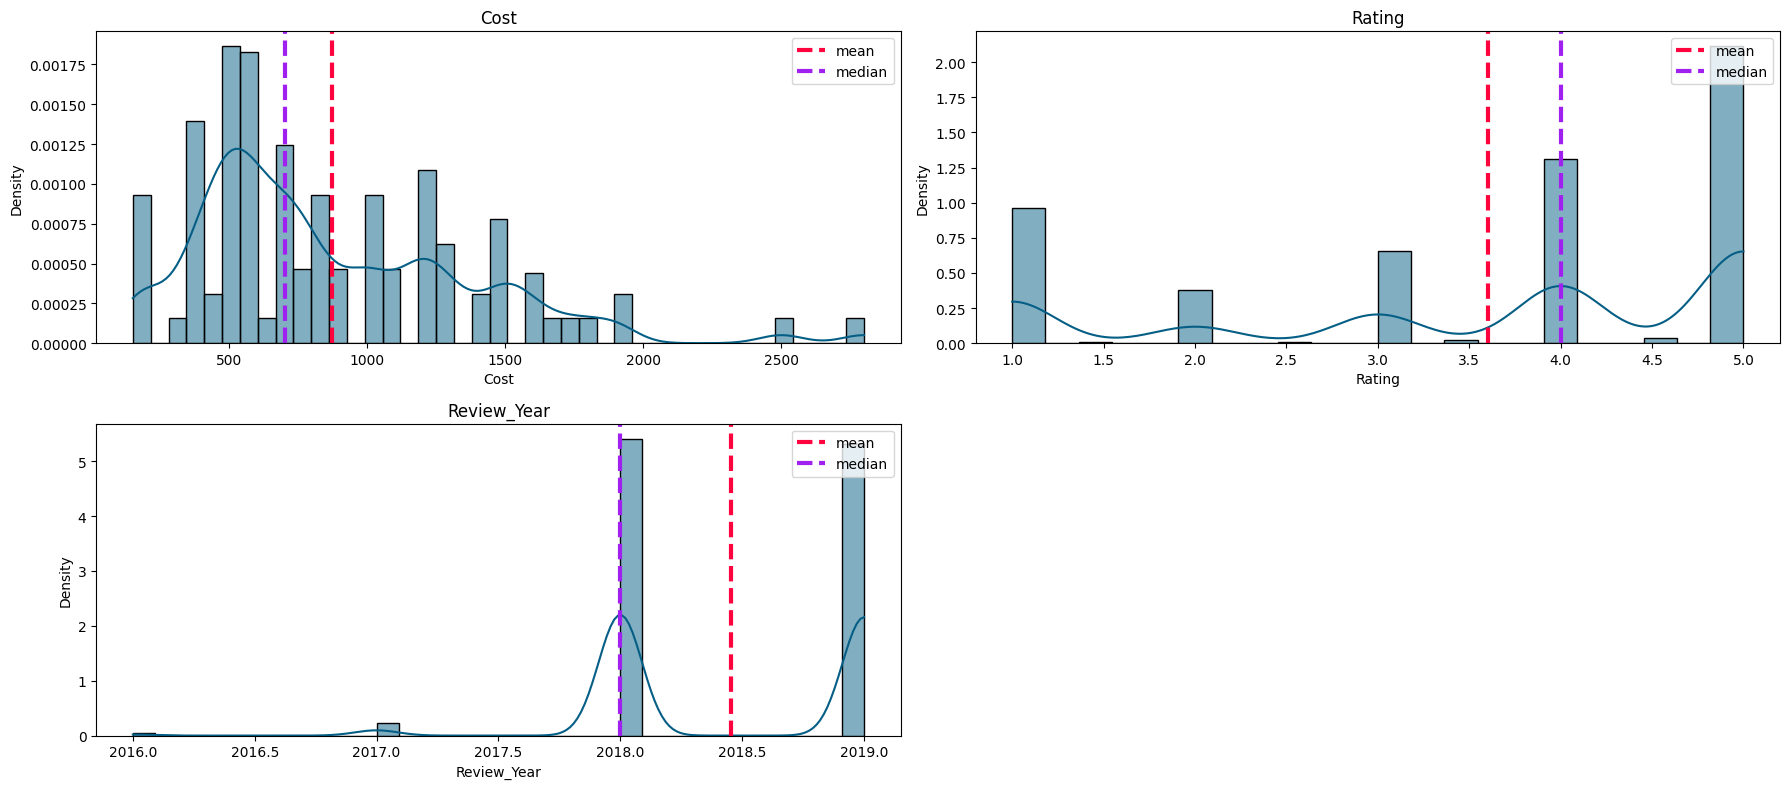

In [72]:
# Chart - 1 visualization code
plt.figure(figsize=(18, 8))
for i, col in enumerate(['Cost', 'Rating', 'Review_Year']):
    plt.subplot(2, 2, i + 1)
    sns.histplot(merged_data[col], kde=True, color='#055E85', stat='density')
    feature = merged_data[col]
    plt.axvline(feature.mean(), color='#ff033e', linestyle='dashed', linewidth=3, label='mean')  # red
    plt.axvline(feature.median(), color='#A020F0', linestyle='dashed', linewidth=3, label='median')  # cyan
    plt.legend(loc='upper right')
    plt.title(f'{col.title()}')
    plt.tight_layout()

plt.show()

##### 1. Why did you pick the specific chart?

The Histplot helps understand the distribution of the feature.

##### 2. What is/are the insight(s) found from the chart?

- All three are positively skewed.
- Maximum restaurant show price range for 500.
- In 2018 the number of reviews is more.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

In this chart, it is unable to figure any impact on business when plotted all alone.

#### Chart - 2 Maximum Engagement and Lowest Engagement

In [73]:
# Geting the top 10 hotel that show maximum engagement
most_engaged_hotel = Avg_price.sort_values('Rating', ascending = False)

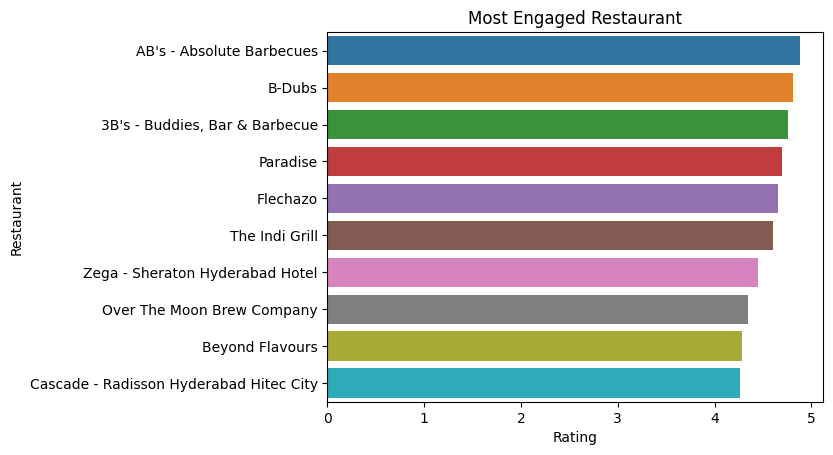

In [74]:
# Chart - 2 visualization code for most liked
sns.barplot(data = most_engaged_hotel[:10], x = 'Rating', y = 'Restaurant')
plt.title('Most Engaged Restaurant')
plt.show()

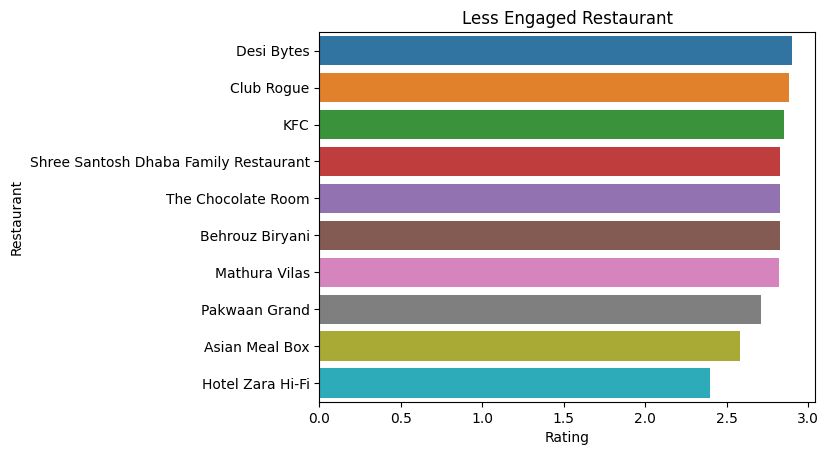

In [75]:
# Chart for less liked Restaurants
sns.barplot(data = most_engaged_hotel[-10:], x = 'Rating', y = 'Restaurant')
plt.title('Less Engaged Restaurant')
plt.show()


##### 1. Why did you pick the specific chart?

A Bar Chart makes it easy to observe and analyze the distribution or relationship between different categories.

##### 2. What is/are the insight(s) found from the chart?

AB's - Absolute Barbecues, show maximum engagement and retention as it has a maximum number of ratings on average and Hotel Zara Hi-Fi shows the lowest engagement as has the lowest average rating.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

* Engagement and retention for any business are very important as profit and scalability for any business depend upon the retention of customers. Maximum retention means people prefer to use the same brand over others.

* Some restaurants show lower ratings which can show negative growth if not monitored why do they receive fewer orders for example KFC is listed at a low rate it is sure they have different outlets and outsourcing and are listed here because of the popularity of the app and increased their sale and demand but are not giving 100% dedication to the platform to generate revenue.

#### Chart - 3 Price Points for High-Rated and Low-Rated Restaurants

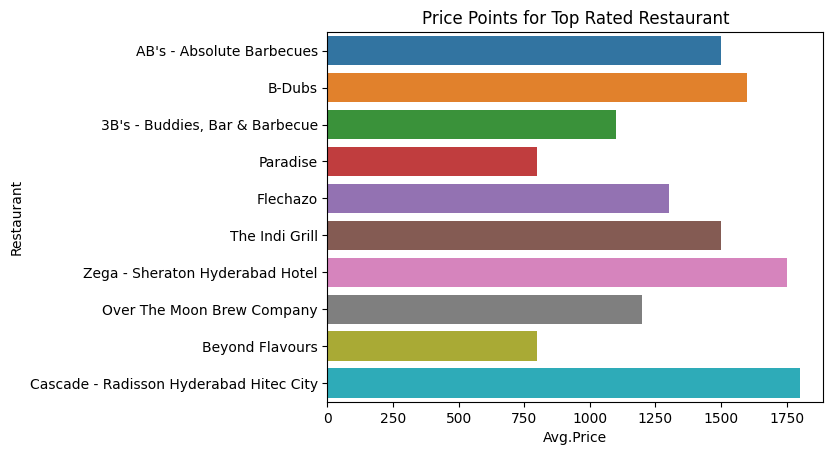

In [77]:
# Chart - 3 Visualization code for price points of high-rated restaurant
sns.barplot(data = most_engaged_hotel[:10], x = 'Avg.Price', y = 'Restaurant')
plt.title('Price Points for Top Rated Restaurant')
plt.show()

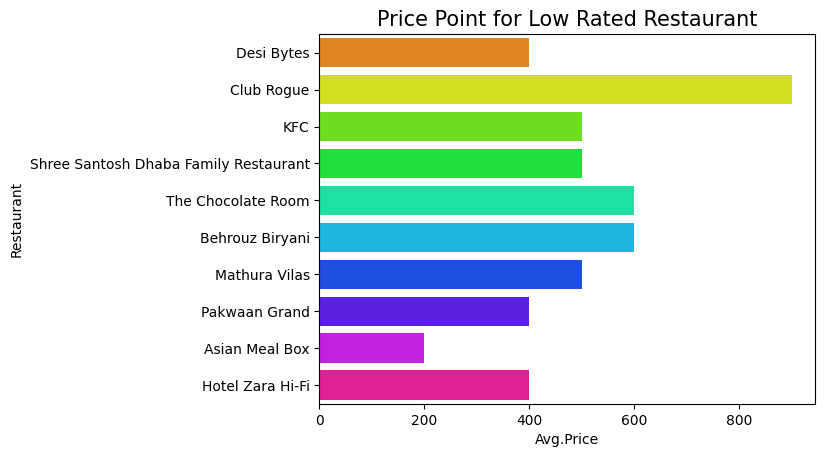

In [80]:
# Visualization code for price points of low-rated restaurant
sns.barplot(data = most_engaged_hotel[-10:], x = 'Avg.Price',
            y = 'Restaurant',palette = 'hsv')
plt.title('Price Point for Low Rated Restaurant', size = 15)

plt.show()

##### 1. Why did you pick the specific chart?

Here I choose barplot because barplot is a good choice for plotting restaurant names and price points as it is a simple and effective way to display the comparison of different categories (Restaurant names) and their corresponding values (Avg. price) on the same chart. Also, it allows us to have a sense of the price range of each Restaurant and how they compare to each other.

##### 2. What is/are the insight(s) found from the chart?

Avg. Price for High-rated hotel AB's= Absolute Barbecues is 1500 and the Avg. price for a low-rated restaurant Hotel Zara Hi-Fi is 400.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Since it is a customer-centred business i.e., direct-to-consumer it is important to understand the price point which makes this business more affordable for everyone, therefore business needs to crack the price point.

Here most liked restaurant has a price point of 1500 which is even a little higher than average but as this business is all about food quality and taste it shows maximum engagement which means it serves the best quality of food, however deep dive into analysing review text can exactly give why this price point is prefered most.

Some restaurants with the lowest ratings even with low price points are not engaging, this may create a negative impact on business.

However it can not be finalized that this hotel should unlisted as there may be a chance of different cuisine they both serve and it also depends upon the locality they both serve, therefore based on that small promotional offers can also be given for low-rated restaurants to increase sales.

#### Chart - 4 Proportion of Cuisine Sold by Most Restaurants.

In [83]:
# List of all cuisine
cuisine_list = cuisine_df.sort_values('Number of Restaurants', ascending = False)['Cuisine'].tolist()[:5]


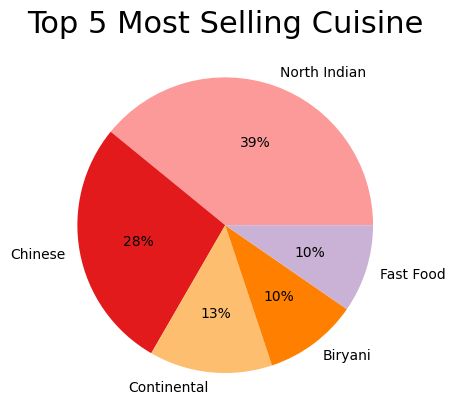

In [85]:
# Chart - 4 visualization code pie chart for top 5 most selling cuisine
data = cuisine_df.sort_values('Number of Restaurants', ascending = False)[
    'Number of Restaurants'].tolist()[:5]
labels = cuisine_list

#define Seaborn color palette to use
colors = sns.color_palette('Paired')[4:9]

#create pie chart
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.title('Top 5 Most Selling Cuisine', size =22, color= 'black')
plt.show()

In [ ]:
# Installing wordcloud
!pip install wordcloud

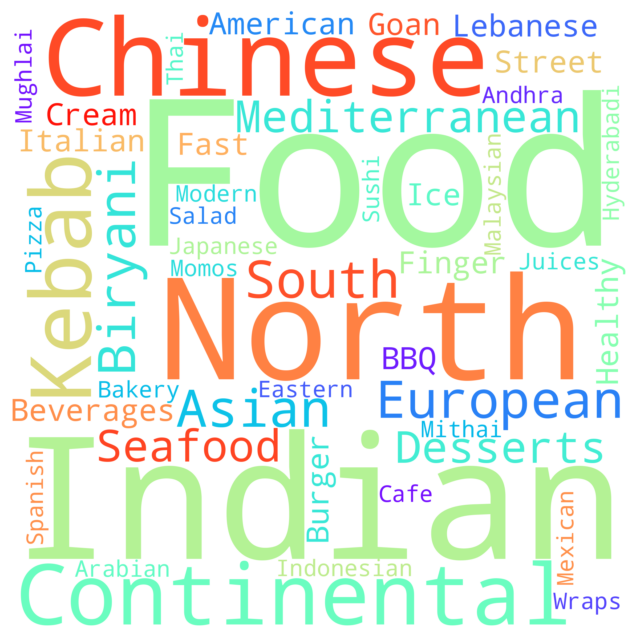

In [94]:
# Importing necessary libraries
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Concatenate all cuisine names into a single text string
plt.figure(figsize=(15, 8))
text = " ".join(name for name in cuisine_df['Cuisine'])

#  Create a WordCloud object
wordcloud = WordCloud(width=2000, height=2000, collocations=False,
                      colormap='rainbow', background_color='white').generate(text)

# Display the generated Word Cloud using Matplotlib
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

##### 1. Why did you pick the specific chart?

Here I choose to use a pie chart because it shows the proportion of each quantity and use wordcloud because it shows all text and highlights the most frequent words.

##### 2. What is/are the insight(s) found from the chart?

Based on the above charts it is clear that most of the Restaurants sold North Indian food followed by Chinese.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Plotting a pie chart of cuisine types can help to identify the most popular cuisine types among its customers. This information can be used to make strategic decisions about which cuisines to focus on promoting and expanding. For example, as a significant portion of customers are searching for North Indian restaurants, Zomato could focus on adding more North Indian restaurants to its platform and promoting them to customers.

Similarly, a word cloud of cuisine can help Zomato identify the most frequently mentioned cuisine types in restaurants. This can provide insight into which cuisines are most popular and well-regarded among customers, and which cuisines may need improvement.

However, these types of charts do not provide all the information about the business, and can not be the only decision-making factor. For example, a pie chart showing that a certain cuisine is popular does not tell us about the profitability of that cuisine or the competition in that category. The same goes for word cloud, it only shows us the frequency of the cuisine mentioned, and it can not tell us if the mentions are positive or negative.

Additionally, these charts do not provide information about the other factors that can impact the business such as market trends, consumer preferences, and economic conditions. Therefore, Zomato needs to consider other data and information when making strategic decisions.

#### Chart - 5

In [96]:
# List of all collection
collection_list = Collections_df.sort_values('Number of Restaurants',
                          ascending = False)['Tags'].tolist()[:5]

In [97]:
# Top 5 collection(tags) used by the Restaurant
Collections_df.sort_values('Number of Restaurants', ascending =False)[:5]

,Tags,Number of Restaurants
2,Great Buffets,11
0,Food Hygiene Rated Restaurants in Hyderabad,8
5,Live Sports Screenings,7
6,Hyderabad's Hottest,7
1,Corporate Favorites,6


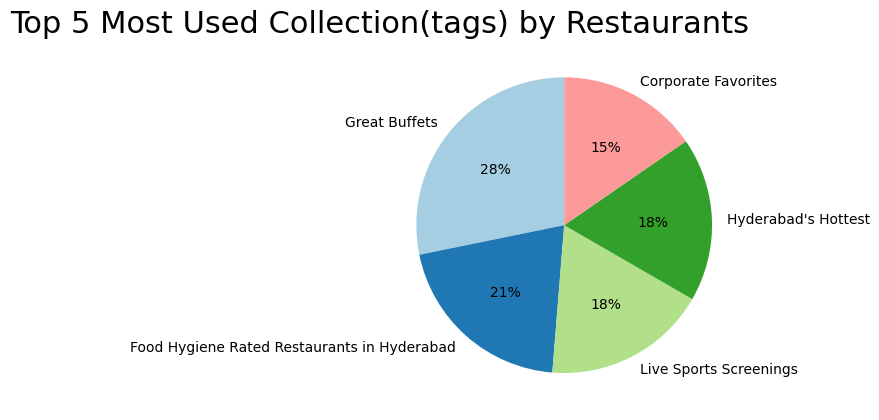

In [105]:
# Chart - 5 visualization code pie chart for top 5 most
# Importing library
import matplotlib.pyplot as plt
import seaborn as sns


# Sort the DataFrame by 'Number of Restaurants' and select the top 5
data = Collections_df.sort_values('Number of Restaurants', ascending=False)[
                                'Number of Restaurants'].tolist()[:5]

# Specify labels for the top 5 collections
labels = collection_list

# Define Seaborn color palette to use
colors = sns.color_palette('Paired')[:5]

# Create a pie chart
title = 'Top 5 Most Used Collection(tags) by Restaurants'
plt.pie(data, labels=labels, colors=colors, autopct='%.0f%%', startangle=90)
plt.title(title, size=22, color='black', loc='right')

# Show the plot
plt.show()


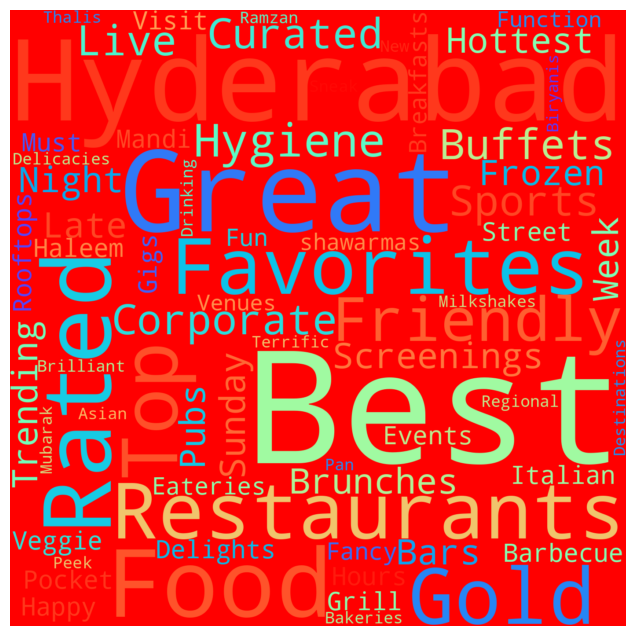

In [112]:
# Importing WordCloud
from wordcloud import WordCloud

# Fixing the size
plt.figure(figsize=(15, 8))

# Concatenate all Tags into a single text string
text = " ".join(tag for tag in Collections_df['Tags'].astype(str))

# Create a WordCloud object with specified parameters
word_cloud = WordCloud(width=1400, height=1400, collocations=False,
                       colormap='rainbow', background_color='red').generate(text)

# Display the generated Word Cloud using Matplotlib
plt.imshow(word_cloud, interpolation='bilinear')

# Turn off the axis labels
plt.axis("off")

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

**Pie Chart:**
A pie chart is used to visually represent the distribution of parts within a whole, making it effective for displaying the proportional contribution of different categories to the total.

**Word Cloud:**
A word cloud visually emphasizes and displays the frequency of words in a text, providing a quick overview of the most prominent terms and helping identify key themes or patterns.

##### 2. What is/are the insight(s) found from the chart?

Great Buffets is the most frequently used tag and other tags great, best, north, and Hyderabad are also used in large quantities.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6 Learn about Reviewers

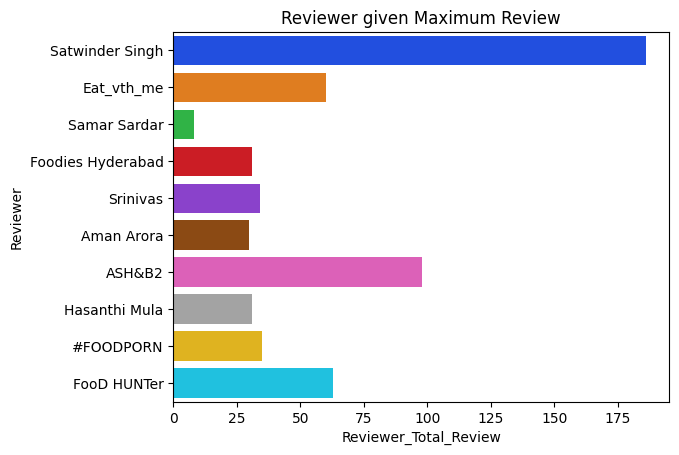

In [114]:
# Chart - 6 visualization code for most reviews done by the reviewers
sns.barplot(data = most_followed_reviewer[:10], x = 'Reviewer_Total_Review',
            y = 'Reviewer', palette='bright')
plt.title('Reviewer given Maximum Review')
plt.show()

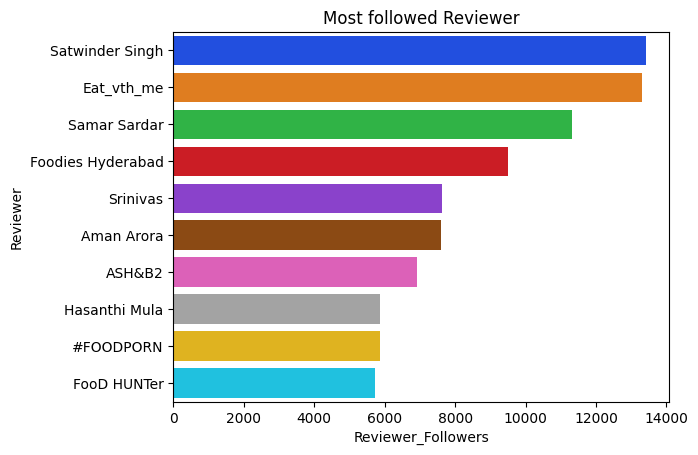

In [115]:
# visualization code for most follower have reviewer
sns.barplot(data = most_followed_reviewer[:10], x = 'Reviewer_Followers',
            y = 'Reviewer',palette='bright')
plt.title('Most followed Reviewer')
plt.show()

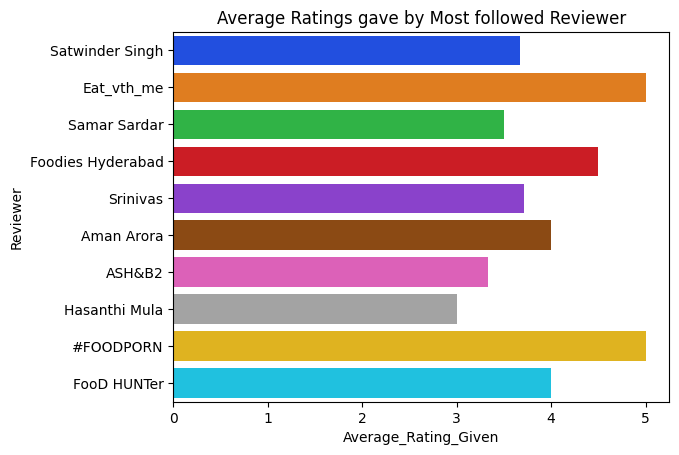

In [118]:
# Visualization code for the average rating given by the most followed reviewer
sns.barplot(data = most_followed_reviewer[:10], x = 'Average_Rating_Given',
            y = 'Reviewer',palette='bright')
plt.title('Average Ratings gave by Most followed Reviewer')
plt.show()


##### 1. Why did you pick the specific chart?

A bar plot is utilized to display and compare the numerical values of different categories or groups, making it effective for visualizing variations and relationships within the data.

##### 2. What is/are the insight(s) found from the chart?

Satwinder Singh is the most popular reviewer who has a maximum number of followers and a maximum number of reviews given, and on average he gave a 3.5 rating.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This information can be used to make strategic decisions about which reviewers to focus on promoting and expanding. For example, if a certain reviewer has a high average rating and a large number of followers, Zomato could focus on promoting their reviews to customers.

It's important to note that this chart does not provide all the information about the business, and can not be the only decision-making factor. However, it can help with promotions of food based on reviews.

#### Chart - 7 Hotel with Highest Price and Lowest Price

In [120]:
# Extracting name and price
price_of_hotel = hotel.sort_values('Cost', ascending = False)[['Restaurant','Cost']]


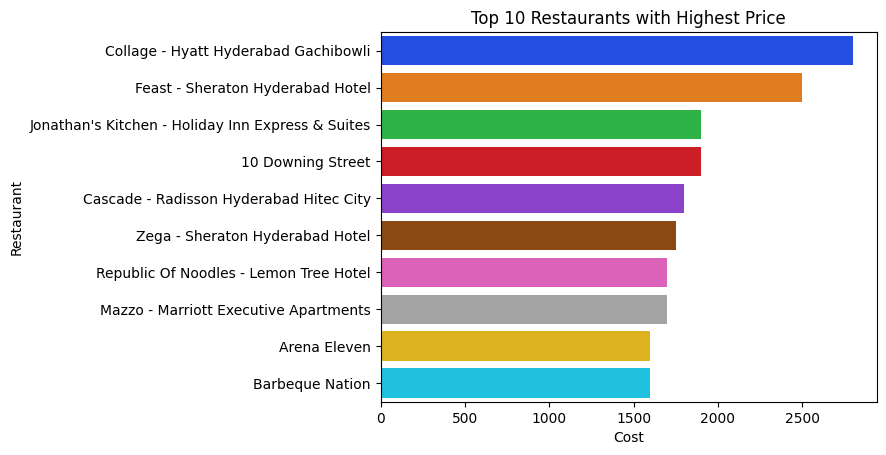

In [125]:
# Chart - 7 Visualization code for restaurants with maximum price
sns.barplot(data = price_of_hotel[:10], x = "Cost", y='Restaurant', palette = 'bright')
plt.title('Top 10 Restaurants with Highest Price')
plt.show()

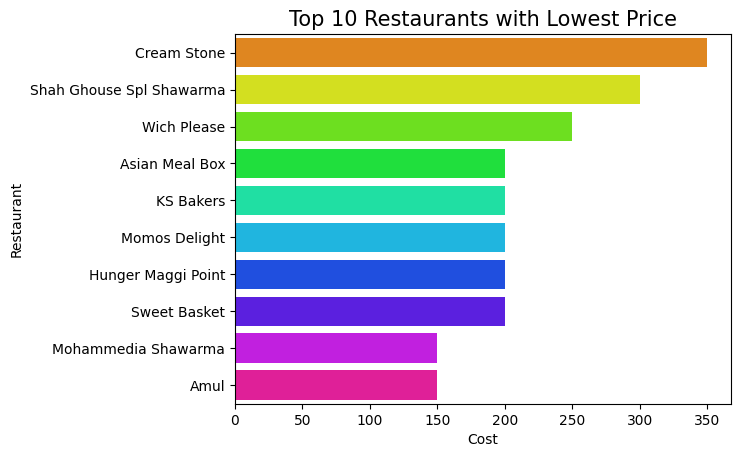

In [133]:
# Restaurants with lowest price
sns.barplot(data = price_of_hotel[-10:], x = "Cost", y='Restaurant', palette = 'hsv')
plt.title('Top 10 Restaurants with Lowest Price', size =15, color = 'black')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***